In [1]:
import pandas as pd
import numpy as np
import string
import nltk, re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize
from collections import Counter
# Seld designed function for ngram
from Function.Function import base_wordpro

In [39]:
df_g = pd.read_csv('eda_g.csv')
df_g.review_lemmatized = df_g.review_lemmatized.apply(eval)
df_s = pd.read_csv('eda.se.csv')
df_s.review_lemmatized = df_s.review_lemmatized.apply(eval)

In [40]:
df_g.head()

,review,overall,label,wordToken,review_lemmatized,user,product
0,like item pricing. granddaughter wanted mark w...,5.0,pos,"['like', 'item', 'pricing.', 'granddaughter', ...","[like, item, pricing., granddaughter, wanted, ...",A1VXOAVRGKGEAK,0439893577
1,love magnet easel... great moving different ar...,4.0,pos,"['love', 'magnet', 'easel...', 'great', 'movin...","[love, magnet, easel..., great, moving, differ...",A8R62G708TSCM,0439893577
2,sides magnetic. real plus entertaining one chi...,5.0,pos,"['sides', 'magnetic.', 'real', 'plus', 'entert...","[side, magnetic., real, plus, entertaining, on...",A21KH420DK0ICA,0439893577
3,"bought one years ago daughter loves it, still ...",5.0,pos,"['bought', 'one', 'years', 'ago', 'daughter', ...","[bought, one, year, ago, daughter, love, it,, ...",AR29QK6HPFYZ4,0439893577
4,stainless steel refrigerator therefore much sp...,4.0,pos,"['stainless', 'steel', 'refrigerator', 'theref...","[stainless, steel, refrigerator, therefore, mu...",ACCH8EOML6FN5,0439893577


In [41]:
df_s.head()

,review,overall,label,wordToken,review_lemmatized,user,product
0,i like the item pricing. my granddaughter want...,5.0,pos,"['i', 'like', 'the', 'item', 'pricing.', 'my',...","[i, like, the, item, pricing., my, granddaught...",A1VXOAVRGKGEAK,0439893577
1,love the magnet easel... great for moving to d...,4.0,pos,"['love', 'the', 'magnet', 'easel...', 'great',...","[love, the, magnet, easel..., great, for, movi...",A8R62G708TSCM,0439893577
2,both sides are magnetic. a real plus when you'...,5.0,pos,"['both', 'sides', 'are', 'magnetic.', 'a', 're...","[both, side, are, magnetic., a, real, plus, wh...",A21KH420DK0ICA,0439893577
3,bought one a few years ago for my daughter and...,5.0,pos,"['bought', 'one', 'a', 'few', 'years', 'ago', ...","[bought, one, a, few, year, ago, for, my, daug...",AR29QK6HPFYZ4,0439893577
4,i have a stainless steel refrigerator therefor...,4.0,pos,"['i', 'have', 'a', 'stainless', 'steel', 'refr...","[i, have, a, stainless, steel, refrigerator, t...",ACCH8EOML6FN5,0439893577


In [45]:
userrank=df_g.groupby(['user']).count().overall.sort_values(ascending=False).reset_index().user

In [54]:
selflist = ['toy','game','get','would','also','really','it.']
df_g = base_wordpro.removeFreqUnimportant(df_g,selflist)

In [55]:
top20 = df_g.loc[df_g.user.isin(userrank[:19])]
top20t050 = df_g.loc[df_g.user.isin(userrank[20:49])]
rest = df_g.loc[df_g.user.isin(userrank[50:])]

Number of words: 30972


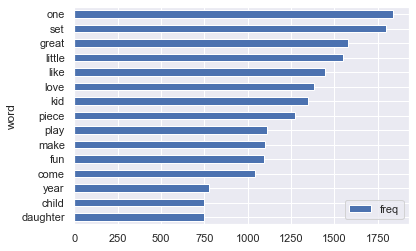

In [56]:
top20P = base_wordpro.wordFreqPlot(top20,lab = 'All',top=15)

Number of words: 33378


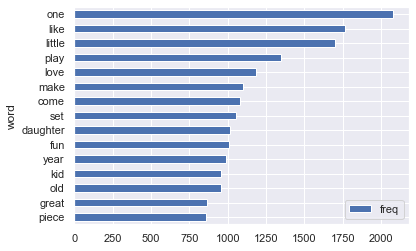

In [57]:
top20t050P = base_wordpro.wordFreqPlot(top20t050,lab = 'All',top=15)

Number of words: 341422


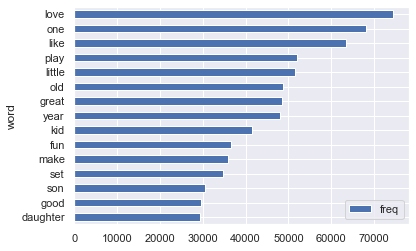

In [58]:
restP = base_wordpro.wordFreqPlot(rest,lab = 'All',top=15)